# 2A.ML101.0: What is machine learning?

Machine Learning is about building programs with **tunable parameters** 
that are adjusted automatically so as to improve
their behavior by **adapting to previously seen data**.

*Source:* [Course on machine learning with scikit-learn](https://github.com/GaelVaroquaux/sklearn_ensae_course) by Gaël Varoquaux

Machine Learning can be considered a subfield of **Artificial Intelligence** since those
algorithms can be seen as building blocks to make computers learn to behave more
intelligently by somehow **generalizing** rather that just storing and retrieving data items
like a database system would do.

We'll take a look at two very simple machine learning tasks here.
The first is a **classification** task: the figure shows a
collection of two-dimensional data, colored according to two different class
labels. A classification algorithm may be used to draw a dividing boundary
between the two clusters of points:

In [1]:
# Start pylab inline mode, so figures will appear in the notebook
%matplotlib inline

c:\python370_x64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


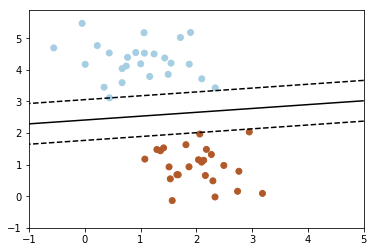

In [2]:
# Import the example plot from the figures directory
from plot_sgd_separator import plot_sgd_separator
plot_sgd_separator()

By drawing this separating line, we have learned a model which can **generalize** to new
data: if you were to drop another point onto the plane which is unlabeled, this algorithm
could now **predict** whether it's a blue or a red point.

The next simple task we'll look at is a **regression** task: a simple best-fit line
to a set of data:

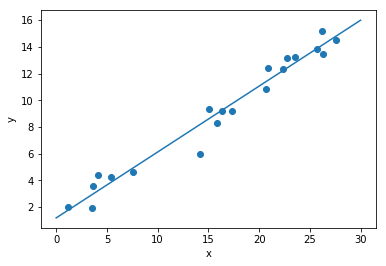

In [3]:
from plot_linear_regression import plot_linear_regression
plot_linear_regression()

Again, this is an example of fitting a model to data, but our focus here is that the model can make
generalizations about new data.  The model has been **learned** from the training
data, and can be used to predict the result of test data:
here, we might be given an x-value, and the model would
allow us to predict the y value.

# Data in scikit-learn

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

### A Simple Example: the Iris Dataset

As an example of a simple dataset, we're going to take a look at the iris data stored by scikit-learn.
The data consists of measurements of three different species of irises.  There are three species of iris
in the dataset, which we can picture here:

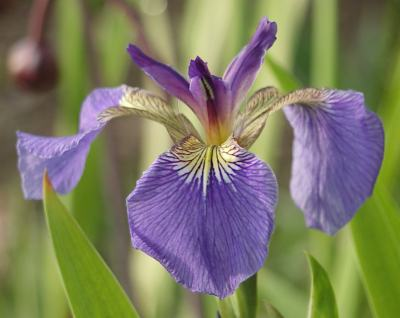

Iris Setosa



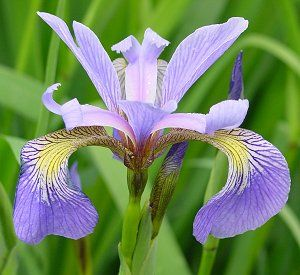

Iris Versicolor



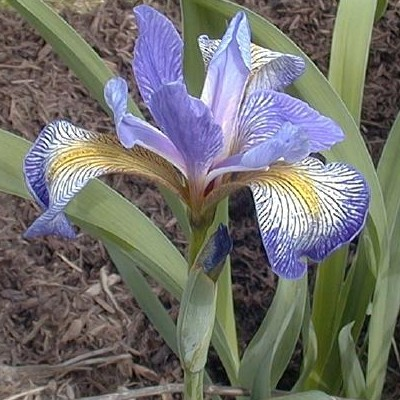

Iris Virginica


In [4]:
from IPython.core.display import Image, display
display(Image(filename='iris_setosa.jpg'))
print("Iris Setosa\n")

display(Image(filename='iris_versicolor.jpg'))
print("Iris Versicolor\n")

display(Image(filename='iris_virginica.jpg'))
print("Iris Virginica")

### Quick Question:

**If we want to design an algorithm to recognize iris species, what might the data be?**

Remember: we need a 2D array of size `[n_samples x n_features]`.

- What would the `n_samples` refer to?

- What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number ``i`` must be a similar kind of quantity for each sample.

### Loading the Iris Data with Scikit-learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

The features of each sample flower are stored in the ``data`` attribute of the dataset:

In [6]:
n_samples, n_features = iris.data.shape
print(n_samples)
print(n_features)
print(iris.data[0])

150
4
[5.1 3.5 1.4 0.2]


The information about the class of each sample is stored in the ``target`` attribute of the dataset:

In [7]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [8]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The names of the classes are stored in the last attribute, namely ``target_names``:

In [9]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four dimensional, but we can visualize two of the dimensions
at a time using a simple scatter-plot.  Again, we'll start by enabling
matplotlib inline mode:

In [10]:
from matplotlib import pyplot as plt

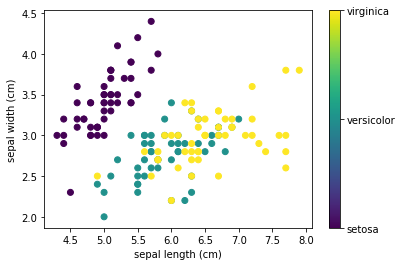

In [11]:
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

**Excercise**: Can you choose x_index and y_index to find a plot where it is easier to seperate the different classes of irises.